#### STOCHASTIC GRADIENT DESCENT

In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/train.csv")
df.shape

(1460, 81)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
y = df['SalePrice']
X = df.loc[:, ('YearBuilt', 'OverallQual')]

<Figure size 432x288 with 0 Axes>

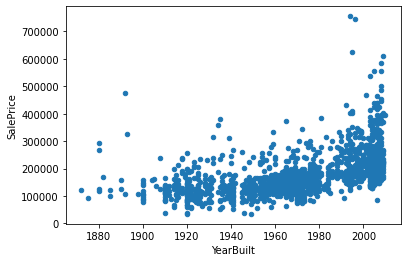

In [5]:
plt.figure()
df.plot.scatter(x="YearBuilt", y="SalePrice");

<Figure size 432x288 with 0 Axes>

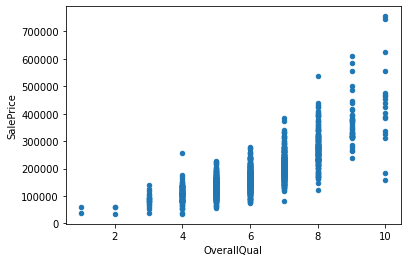

In [6]:
plt.figure()
df.plot.scatter(x="OverallQual", y="SalePrice");

In [7]:
n = X.shape[1]
m = X.shape[0]
W = np.random.uniform(size=n+1)
y = y.to_numpy()
X.loc[:,'b'] = 1
X = X.to_numpy()

In [8]:
W

array([0.39817321, 0.60159205, 0.17118394])

In [9]:
def h(W: ndarray, X: ndarray) -> float:
    return np.sum(np.multiply(W, X))

In [10]:
def loss_func(y: ndarray, x: ndarray, W: ndarray) -> float:
    return np.sum([np.subtract(h(W, x), y)])

In [11]:
def cost_func(loss: float) -> float:
    return (loss ** 2) / 2

In [12]:
def gradient_func(loss: float, X: ndarray, W:ndarray) -> list:
    return [np.multiply(loss, X[j]) for j in range(len(W))]

In [26]:
def train(W: ndarray, X: ndarray, Y: ndarray, lr: float, epochs: int)-> ndarray:
    for epoch in range(epochs):
        losses = []
        costs = []
        for i in range(X.shape[0]):
            loss = loss_func(Y[i], X[i], W)
            losses.append(loss)
            
            cost = cost_func(loss)
            costs.append(cost)
            
            gradient = gradient_func(loss, X[i], W)
            W = np.subtract(W, np.multiply(lr, gradient))
        
        print(f'Current epoch: {epoch}, Running loss: {np.sum(losses)/X.shape[0]}')
        print(f'Current epoch: {epoch}, Running cost: {np.sum(costs)/X.shape[0]}')
        print(f'Current epoch: {epoch}, Running Weights: {W}')
        print('-------------')
        
    return W

In [28]:
lr = 0.00000001
epochs = 100

result = train(W, X, y, lr, epochs)
result

Current epoch: 0, Running loss: -2488.821393647332
Current epoch: 0, Running cost: 3260897969.042138
Current epoch: 0, Running Weights: [89.37570079  2.07367267  0.20752073]
-------------
Current epoch: 1, Running loss: 598.6432970793682
Current epoch: 1, Running cost: 3110217098.9989686
Current epoch: 1, Running Weights: [89.37210732  3.26226604  0.19878054]
-------------
Current epoch: 2, Running loss: 598.6304762530318
Current epoch: 2, Running cost: 3110118706.763039
Current epoch: 2, Running Weights: [89.36851395  4.45082858  0.19004053]
-------------
Current epoch: 3, Running loss: 598.6176557590815
Current epoch: 3, Running cost: 3110020319.6368203
Current epoch: 3, Running Weights: [89.36492068  5.63936031  0.18130072]
-------------
Current epoch: 4, Running loss: 598.6048355975443
Current epoch: 4, Running cost: 3109921937.6200476
Current epoch: 4, Running Weights: [89.36132749  6.82786122  0.17256108]
-------------
Current epoch: 5, Running loss: 598.592015768383
Current epoc

Current epoch: 89, Running cost: 3101578113.1437707
Current epoch: 89, Running Weights: [ 89.05624721 107.73789237  -0.56962391]
-------------
Current epoch: 90, Running loss: 597.5035442432164
Current epoch: 90, Running cost: 3101480169.548851
Current epoch: 90, Running Weights: [ 89.05266204 108.92374613  -0.57834746]
-------------
Current epoch: 91, Running loss: 597.4907529669273
Current epoch: 91, Running cost: 3101382231.040361
Current epoch: 91, Running Weights: [ 89.04907695 110.10956914  -0.58707083]
-------------
Current epoch: 92, Running loss: 597.4779620222866
Current epoch: 92, Running cost: 3101284297.618035
Current epoch: 92, Running Weights: [ 89.04549196 111.2953614   -0.595794  ]
-------------
Current epoch: 93, Running loss: 597.4651714092591
Current epoch: 93, Running cost: 3101186369.281611
Current epoch: 93, Running Weights: [ 89.04190706 112.48112293  -0.60451699]
-------------
Current epoch: 94, Running loss: 597.4523811278575
Current epoch: 94, Running cost: 3

array([ 89.02039961, 119.59504646,  -0.65685102])

In [20]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/test.csv")
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
X_test = df.loc[:, ('YearBuilt', 'OverallQual')]
X_test.loc[:,'b'] = 1
X_test = X_test.to_numpy()

In [23]:
[h(result, x) for x in X_test]

[175211.844608725,
 175015.30347850898,
 178421.8722286614,
 178582.00083399386,
 178188.91857356185,
 178136.16366455826,
 178046.99623067112,
 178582.00083399386,
 177939.62253434226,
 175943.3903422637,
 178742.12943932635,
 176174.48011904157,
 176103.51894759623,
 176531.14985459007,
 176602.11102603542,
 179775.7261210883,
 179704.76494964294,
 179419.0563855398,
 179348.09521409444,
 179240.72151776555,
 179080.5929124331,
 179437.26264798158,
 179206.17287120371,
 179366.3014765362,
 179187.96660876196,
 179187.96660876196,
 178723.9231768846,
 179348.09521409444,
 179633.80377819756,
 179206.17287120371,
 179187.96660876196,
 171555.979819353,
 176441.98242070293,
 178278.086007449,
 178188.91857356185,
 179187.96660876196,
 179187.96660876196,
 179187.96660876196,
 179187.96660876196,
 179206.17287120371,
 178760.3357017681,
 179098.79917487482,
 179793.93238353007,
 178902.25804465884,
 179009.6317409877,
 175817.81038349308,
 178136.16366455826,
 176798.65215625142,
 176174